<a href="https://colab.research.google.com/github/pschofield2/machine_learning/blob/main/Analyzing_Actual_Win_vs_Expected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install nfl_data_py --upgrade --quiet

In [45]:
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import requests

## Getting Win Total Lines for Each Team

In [78]:
page = requests.get('https://www.thelines.com/odds/nfl-win-totals/', auth=('user', 'pass'))
soup = BeautifulSoup(page.text, 'html.parser')

In [ ]:
print(soup.prettify())

In [81]:
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['tablepress', 'tablepress-id-1434', 'tablepress-responsive']
['tablepress', 'tablepress-id-1041', 'tablepress-responsive']


In [85]:
#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='tablepress-id-1434')

In [ ]:
table

In [144]:
projected_wins_df = pd.DataFrame(columns = ['team_name','proj_wins'])
projected_wins_df.head()

,team_name,proj_wins


In [ ]:
for row in table.tbody.find_all('tr'):
  columns = row.find_all('td')
  
  if(columns != []):
    team = columns[0].text.strip()
    win_totals = columns[1].text.strip()

    projected_wins_df = projected_wins_df.append({'team_name':team,
                                                  'proj_wins': win_totals},ignore_index = True)

In [146]:
projected_wins_df.head(32)

,team_name,proj_wins
0,Tampa Bay Buccaneers,11.5
1,Buffalo Bills,11.5
2,Green Bay Packers,11
3,Kansas City Chiefs,10.5
4,LA Rams,10.5
5,Dallas Cowboys,10
6,San Francisco 49ers,10
7,LA Chargers,10
8,Cincinnati Bengals,10
9,Denver Broncos,10


## Get Actual Wins

In [98]:
schedule_df = nfl.import_schedules([2022])

for column in schedule_df.columns:
  print(column)

game_id
season
game_type
week
gameday
weekday
gametime
away_team
away_score
home_team
home_score
location
result
total
overtime
old_game_id
gsis
nfl_detail_id
pfr
pff
espn
away_rest
home_rest
away_moneyline
home_moneyline
spread_line
away_spread_odds
home_spread_odds
total_line
under_odds
over_odds
div_game
roof
surface
temp
wind
away_qb_id
home_qb_id
away_qb_name
home_qb_name
away_coach
home_coach
referee
stadium_id
stadium


In [103]:
pd.set_option('display.max_columns',None)
schedule_df.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6137,2022_01_BUF_LA,2022,REG,1,2022-09-08,Thursday,20:20,BUF,31.0,LA,10.0,Home,-21.0,41.0,0.0,2022090800,NaN,NaN,202209080ram,NaN,401437654,7,7,-117.0,106.0,-1.0,-112.0,101.0,51.5,-101.0,-111.0,0,dome,matrixturf,NaN,NaN,00-0034857,00-0026498,Josh Allen,Matthew Stafford,Sean McDermott,Sean McVay,Carl Cheffers,LAX01,SoFi Stadium
6138,2022_01_NO_ATL,2022,REG,1,2022-09-11,Sunday,13:00,NO,27.0,ATL,26.0,Home,-1.0,53.0,0.0,2022091100,NaN,NaN,202209110atl,NaN,401437650,7,7,-228.0,201.0,-6.0,-103.0,-107.0,43.5,-104.0,-108.0,1,closed,fieldturf,NaN,NaN,00-0031503,00-0032268,Jameis Winston,Marcus Mariota,Dennis Allen,Arthur Smith,Alex Kemp,ATL97,Mercedes-Benz Stadium
6139,2022_01_CLE_CAR,2022,REG,1,2022-09-11,Sunday,13:00,CLE,26.0,CAR,24.0,Home,-2.0,50.0,0.0,2022091101,NaN,NaN,202209110car,NaN,401437651,7,7,114.0,-125.0,2.5,-112.0,102.0,42.5,-113.0,100.0,0,outdoors,grass,NaN,NaN,00-0033119,00-0034855,Jacoby Brissett,Baker Mayfield,Kevin Stefanski,Matt Rhule,Brad Rogers,CAR00,Bank of America Stadium
6140,2022_01_SF_CHI,2022,REG,1,2022-09-11,Sunday,13:00,SF,10.0,CHI,19.0,Home,9.0,29.0,0.0,2022091102,NaN,NaN,202209110chi,NaN,401437647,7,7,-248.0,217.0,-6.5,100.0,-111.0,38.0,-103.0,-109.0,0,outdoors,grass,NaN,NaN,00-0037012,00-0036945,Trey Lance,Justin Fields,Kyle Shanahan,Matt Eberflus,Clay Martin,CHI98,Soldier Field
6141,2022_01_PIT_CIN,2022,REG,1,2022-09-11,Sunday,13:00,PIT,23.0,CIN,20.0,Home,-3.0,43.0,1.0,2022091103,NaN,NaN,202209110cin,NaN,401437634,7,7,264.0,-308.0,7.5,-119.0,107.0,44.5,101.0,-113.0,1,outdoors,fieldturf,NaN,NaN,00-0033869,00-0036442,Mitch Trubisky,Joe Burrow,Mike Tomlin,Zac Taylor,Shawn Hochuli,CIN00,Paycor Stadium


In [104]:
schedule_df = schedule_df[schedule_df['game_type'] == 'REG']

In [125]:
record = {'team_abbr':[],
        'wins': []}

teams = schedule_df['home_team'].unique()

for team in teams:
  
  wins = 0
  
  
  team_df = schedule_df.loc[(schedule_df['away_team'] == team) | (schedule_df['home_team'] == team)]

  for _, row in team_df.iterrows():

    if (row['home_team'] == team and row['home_score'] > row['away_score']) or (row['away_team'] == team and row['away_score'] > row['home_score']):
      wins +=1
  record['team_abbr'].append(team)
  record['wins'].append(wins)


In [134]:
record_df = pd.DataFrame(record).sort_values(by='wins',ascending = False)
record_df.head(32)

,team_abbr,wins
16,KC,14
28,PHI,14
27,BUF,13
23,SF,13
12,MIN,13
4,CIN,12
14,DAL,12
11,LAC,10
17,BAL,10
15,SEA,9


## Now I need to get the full team names instead of the abbreviations to join to scraped df

In [149]:
nfl_teams = nfl.import_team_desc()[['team_abbr','team_name']]
nfl_teams.head(32)

,team_abbr,team_name
0,ARI,Arizona Cardinals
1,ATL,Atlanta Falcons
2,BAL,Baltimore Ravens
3,BUF,Buffalo Bills
4,CAR,Carolina Panthers
5,CHI,Chicago Bears
6,CIN,Cincinnati Bengals
7,CLE,Cleveland Browns
8,DAL,Dallas Cowboys
9,DEN,Denver Broncos


In [152]:
projected_wins_df.replace('LA Chargers','Los Angeles Chargers',inplace= True)
projected_wins_df.replace('LA Chargers','Los Angeles Rams',inplace= True)
projected_wins_df.head(32)

,team_name,proj_wins
0,Tampa Bay Buccaneers,11.5
1,Buffalo Bills,11.5
2,Green Bay Packers,11
3,Kansas City Chiefs,10.5
4,Los Angeles Rams,10.5
5,Dallas Cowboys,10
6,San Francisco 49ers,10
7,Los Angeles Chargers,10
8,Cincinnati Bengals,10
9,Denver Broncos,10


In [138]:
# merge to record_df on team_abbr

record_df = record_df.merge(nfl_teams, how = 'inner', on = 'team_abbr')
record_df.head(32)

,team_abbr,wins,team_name
0,KC,14,Kansas City Chiefs
1,PHI,14,Philadelphia Eagles
2,BUF,13,Buffalo Bills
3,SF,13,San Francisco 49ers
4,MIN,13,Minnesota Vikings
5,CIN,12,Cincinnati Bengals
6,DAL,12,Dallas Cowboys
7,LAC,10,Los Angeles Chargers
8,BAL,10,Baltimore Ravens
9,SEA,9,Seattle Seahawks


In [157]:
# merge to projected df on team_name
new_df = record_df.merge(projected_wins_df, how = 'left', on = 'team_name')
new_df.head(32)

,team_abbr,wins,team_name,proj_wins
0,KC,14,Kansas City Chiefs,10.5
1,PHI,14,Philadelphia Eagles,9.5
2,BUF,13,Buffalo Bills,11.5
3,SF,13,San Francisco 49ers,10
4,MIN,13,Minnesota Vikings,9
5,CIN,12,Cincinnati Bengals,10
6,DAL,12,Dallas Cowboys,10
7,LAC,10,Los Angeles Chargers,10
8,BAL,10,Baltimore Ravens,9.5
9,SEA,9,Seattle Seahawks,5.5


In [160]:
first_column = new_df.pop('team_name')
new_df.insert(0, 'team_name',first_column)

new_df = new_df.set_index('team_abbr')
new_df.head()

,team_name,wins,proj_wins
team_abbr,,,
KC,Kansas City Chiefs,14,10.5
PHI,Philadelphia Eagles,14,9.5
BUF,Buffalo Bills,13,11.5
SF,San Francisco 49ers,13,10
MIN,Minnesota Vikings,13,9


In [187]:
new_df['proj_wins'] = new_df['proj_wins'].astype('float')
new_df['win_difference'] = new_df['wins'] - new_df['proj_wins']
new_df = new_df.sort_values(by = 'win_difference', ascending = False)
new_df.head()

,team_name,wins,proj_wins,win_difference
team_abbr,,,,
PHI,Philadelphia Eagles,14,9.5,4.5
KC,Kansas City Chiefs,14,10.5,3.5
SF,San Francisco 49ers,13,10.0,3.0
MIN,Minnesota Vikings,13,9.0,4.0
BUF,Buffalo Bills,13,11.5,1.5


In [232]:
new_df = new_df.reset_index()

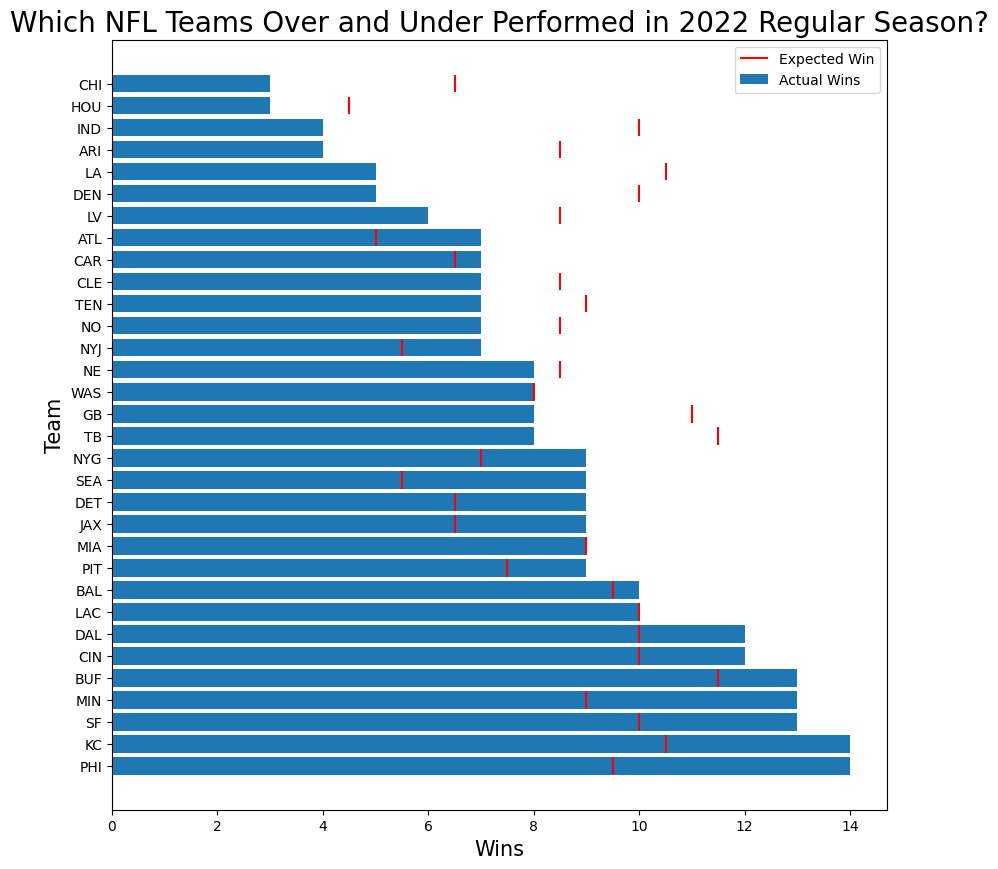

In [243]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh(new_df['team_abbr'], new_df['wins'], label = 'Actual Wins')
for index, row in new_df.iterrows():
  ax.vlines(row['proj_wins'], ymin = index - 0.4, ymax = index + 0.4, colors = 'red', label = 'Expected Win' if index == 0 else '')

ax.set_title('Which NFL Teams Over and Under Performed in 2022 Regular Season?', fontsize = 20)
ax.set_xlabel('Wins', fontsize = 15)
ax.set_ylabel('Team', fontsize = 15)
ax.legend();